# Vogelunfälle mit Flugzeugen
# Einleitung
## Zielsetzung

Dieses Notebook behandelt die explorative und graphische Analyse einer Teilmenge des 'Wildlife Strikes' Datensatzes. Dieser enthält eine Auflistung der US Luftfahrtbehörde an Flugzeugunfällen verursacht durch Kollisionen mit Vögeln. Zusammenhänge zwischen verschiedenen Attributen wie Flughöhe, Uhrzeit, Vogelspezies unsw. werden analysiert, wodurch Einflüsse identifiziert werden, welche einen Zwischenfall zwischen Flugzeugen und Vögeln begünstigen.

## Der Datensatz

Verwendet wird eine reduzierte Version des Datensatzes unter https://www.kaggle.com/faa/wildlife-strikes. Die Anzahl an Attributen und Dateneinträgen ist deutlich veringert. Dies dient in erster Linie der besseren 
Übersichtlichkeit.

**Keywords: Qualitative Explorative Data Analysis**

## Modul Import

In [1]:
import numpy as np
import pandas as pd
import sys
from collections import Counter
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Datensatz laden

In [2]:
df = pd.read_csv('bird_strikes_data.csv', low_memory=False, thousands=',')
df.head()

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots
0,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,A-319,NaN,1/1/2005 0:00,227413,No damage,2,NORTHWEST AIRLINES,Michigan,...,NaN,NaN,NaN,NaN,0,0,0,NaN,400.0,NaN
1,DANE COUNTY REGIONAL ARPT-TRUAX FLD,< 1000 ft,A-320,NaN,1/1/2005 0:00,226578,No damage,2,NORTHWEST AIRLINES,Wisconsin,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN
2,HOGUE ARPT,< 1000 ft,PA-46 MALIBU,NaN,1/1/2005 0:00,268383,Caused damage,1,PRIVATELY OWNED,Tennessee,...,NaN,Day,NaN,NaN,0,0,0,0.0,0.0,20.0
3,SACRAMENTO INTL,< 1000 ft,B-737-300,None,1/1/2005 0:00,229514,Caused damage,2,SOUTHWEST AIRLINES,California,...,2140.0,Night,Y,NaN,0,117135,117135,NaN,500.0,142.0
4,GUARULHOS INTL,< 1000 ft,B-767-300,NaN,1/1/2005 0:00,225661,No damage,2,UNITED AIRLINES,NaN,...,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65610 entries, 0 to 65609
Data columns (total 23 columns):
Airport: Name                                 65601 non-null object
Altitude bin                                  65610 non-null object
Aircraft: Make/Model                          65610 non-null object
Effect: Impact to flight                      36516 non-null object
FlightDate                                    65610 non-null object
Record ID                                     65610 non-null int64
Effect: Indicated Damage                      65610 non-null object
Aircraft: Number of engines?                  42766 non-null object
Aircraft: Airline/Operator                    65610 non-null object
Origin State                                  59163 non-null object
When: Phase of flight                         41051 non-null object
Wildlife: Size                                56684 non-null object
Wildlife: Species                             65593 non-null object
When: Ti

Viele Daten nur unvollständig vorhanden, teilweise fast nur NaNs. Imputiere Daten falls möglich. Allerdings werden viele Datenstätze verworfen werden müssen. Einige Spalten wie "Record ID" und diverse Kosten sind für Fragestellung irrelevant und können ganz weggelassen werden.

In [4]:
# entferne testweise alle nutzlosen Spalten und dann alle NaNs
df.drop(columns=['Record ID',
                 'Cost: Other (inflation adj)',
                 'Cost: Repair (inflation adj)',
                 'Cost: Total $',
                 'Cost: Aircraft time out of service (hours)']).dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7243 entries, 5 to 65607
Data columns (total 18 columns):
Airport: Name                         7243 non-null object
Altitude bin                          7243 non-null object
Aircraft: Make/Model                  7243 non-null object
Effect: Impact to flight              7243 non-null object
FlightDate                            7243 non-null object
Effect: Indicated Damage              7243 non-null object
Aircraft: Number of engines?          7243 non-null object
Aircraft: Airline/Operator            7243 non-null object
Origin State                          7243 non-null object
When: Phase of flight                 7243 non-null object
Wildlife: Size                        7243 non-null object
Wildlife: Species                     7243 non-null object
When: Time (HHMM)                     7243 non-null float64
When: Time of day                     7243 non-null object
Pilot warned of birds or wildlife?    7243 non-null object
Miles 

## Erkenntniss:
Großteil der Daten geht verloren! Feinere Datenbereinigung nötig!

# Untersuche Struktur und Eigenschaften der Spaltendaten

## Entwickle Strategien und setze diese im Abschnitt Datenbereinigung um

## Airport: Name

In [5]:
df['Airport: Name'].isna().sum()

9

In [6]:
vcounts = df['Airport: Name'].value_counts()
vcounts

UNKNOWN                                5989
DENVER INTL AIRPORT                    2351
DALLAS/FORT WORTH INTL ARPT            1819
MEMPHIS INTL                           1234
JOHN F KENNEDY INTL                    1228
CHICAGO O'HARE INTL ARPT               1124
SACRAMENTO INTL                        1041
LOUISVILLE INTL ARPT                    964
SALT LAKE CITY INTL                     849
KANSAS CITY INTL                        846
ORLANDO INTL                            792
LAGUARDIA NY                            743
PHILADELPHIA INTL                       708
NEW ORLEANS INTL                        695
NEWARK LIBERTY INTL ARPT                691
DETROIT METRO WAYNE COUNTY ARPT         679
CLEVELAND-HOPKINS INTL ARPT             659
PORTLAND INTL (OR)                      654
AUSTIN-BERGSTROM INTL                   648
BALTIMORE WASH INTL                     618
HOUSTON-HOBBY                           617
MINNEAPOLIS-ST PAUL INTL                609
WASHINGTON DULLES INTL ARPT     

In [7]:
# füge die Spaltennamen zu einem großen String zusammen
full_string = ' '.join(list(df['Airport: Name'].astype(str).values))

In [8]:
# Counter aus collections, zähle Häufigkeit von Namensfragmenten
Counter(full_string.split(' ')).most_common(50)

[('INTL', 36256),
 ('ARPT', 18847),
 ('UNKNOWN', 5989),
 ('AIRPORT', 3715),
 ('REGIONAL', 2525),
 ('CITY', 2379),
 ('DENVER', 2351),
 ('AIR', 2270),
 ('BASE', 2033),
 ('FORCE', 1997),
 ('WORTH', 1952),
 ('DALLAS/FORT', 1819),
 ('COUNTY', 1721),
 ('MUNICIPAL', 1711),
 ('FIELD', 1653),
 ('CHICAGO', 1624),
 ('SAN', 1458),
 ('METRO', 1431),
 ('JOHN', 1372),
 ('F', 1239),
 ('MEMPHIS', 1234),
 ('KENNEDY', 1228),
 ("O'HARE", 1124),
 ('SACRAMENTO', 1104),
 ('LOUISVILLE', 964),
 ('ORLANDO', 941),
 ('WAYNE', 905),
 ('WASHINGTON', 900),
 ('LAKE', 882),
 ('GREATER', 859),
 ('SALT', 849),
 ('KANSAS', 847),
 ('PORTLAND', 773),
 ('NEW', 773),
 ('LAGUARDIA', 743),
 ('NY', 743),
 ('PHILADELPHIA', 720),
 ('FORT', 714),
 ('ORLEANS', 695),
 ('NEWARK', 691),
 ('LIBERTY', 691),
 ('DETROIT', 679),
 ('CLEVELAND-HOPKINS', 659),
 ('(OR)', 655),
 ('AUSTIN-BERGSTROM', 653),
 ('PAUL', 633),
 ('AIRFIELD', 629),
 ('WASH', 618),
 ('BALTIMORE', 618),
 ('HOUSTON-HOBBY', 617)]

### Ansatz:
Unterscheide Flughäfen nach Typ: INTL, REGIONAL, MUNICIPAL, FORCE|BASE|AIR FIELD|AIRFIELD, COUNTY, METRO

### Umgang mit fehlenden Werten:
Setze NaN und Unknown gleich, nicht ohne weiteres zu imputieren, nur 10% fehlende Werte, am besten Zeilen dropen

## Altitude bin

In [9]:
df['Altitude bin'].isna().sum()

0

In [10]:
vcounts = df['Altitude bin'].value_counts()
vcounts

Unknown      30541
< 1000 ft    27523
> 1000 ft     7546
Name: Altitude bin, dtype: int64

In [11]:
# prüfe, ob es Datenstätze gibt bei denen 'Altitude bin' unbestimmt ist obwohl die Flughöhe bekannt ist
df[(df['Feet above ground'].isna == False) & (df['Altitude bin'] != 'Unknown')]

,Airport: Name,Altitude bin,Aircraft: Make/Model,Effect: Impact to flight,FlightDate,Record ID,Effect: Indicated Damage,Aircraft: Number of engines?,Aircraft: Airline/Operator,Origin State,...,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Cost: Aircraft time out of service (hours),Cost: Other (inflation adj),Cost: Repair (inflation adj),Cost: Total $,Miles from airport,Feet above ground,Speed (IAS) in knots


### Ansatz:
Behalte binäre unterscheidung bei.

### Umgang mit fehlenden Werten:
Sehr viele Unknown/NaN. Theoretisch imputierbar durch "Feet above ground", aber die sind immer gleichzeitig NaN. Vermutlich wichtige Zeile -> es müssen wohl viele Zeilen gelöscht werden.

## Aircraft: Make/Model

In [12]:
df['Aircraft: Make/Model'].isna().sum()

0

In [13]:
vcounts = df['Aircraft: Make/Model'].value_counts()
vcounts

UNKNOWN                 19540
B-737-700                3634
CL-RJ100/200             3133
B-737-300                2912
A-320                    2825
B-757-200                2363
A-319                    1967
A-300                    1748
EMB-145                  1618
B-737-800                1132
CL-RJ700                  964
B-767-300                 907
DHC8 DASH 8               883
MD-11                     779
B-727-200                 770
MD-82                     722
B-717-200                 690
CL-RJ900                  614
B-737-500                 551
DC-10-10                  529
EMB-190                   521
EMB-170                   514
C-172                     495
MD-88                     449
MD-83                     438
B-737-400                 437
BE-1900                   421
A-310                     412
EMB-135                   403
C-130                     389
                        ...  
BELL-205A1                  1
CT-43A                      1
C-12J     

In [14]:
# reduziere Modellbezeichnungen auf ersten Ausdruck vor ' ' bzw. '-'
# Model zu Hersteller
vcounts = df['Aircraft: Make/Model'].apply(lambda x: re.split(' |-', str(x))[0]).value_counts()
vcounts

UNKNOWN         19540
B               15437
A                7438
CL               4853
EMB              3347
C                3257
MD               2695
DC               1595
BE               1147
DHC8              883
PA                560
KC                378
LEARJET           364
T                 345
SAAB              320
F                 298
DA                241
AEROS             178
BELL              176
EC                169
HAWKER            152
LOCKHEED          139
CIRRUS            134
GULFAERO          128
CRJ               125
CITATION          119
ATR               113
CITATIONJET        92
BA                 76
CHALLENGER         69
                ...  
MQ9                 2
FLIGHT              2
MAULE               2
CHAMPION            2
EADS                2
U                   2
HELICOPTER          2
PARTENAVIA68        2
AEROSTAR            1
F/A                 1
CAP                 1
ALON                1
AMD                 1
SABRLNR             1
ZODIAC    

In [15]:
significant_ModelClasses = vcounts[vcounts > 100].index.values
significant_ModelClasses

array(['UNKNOWN', 'B', 'A', 'CL', 'EMB', 'C', 'MD', 'DC', 'BE', 'DHC8',
       'PA', 'KC', 'LEARJET', 'T', 'SAAB', 'F', 'DA', 'AEROS', 'BELL',
       'EC', 'HAWKER', 'LOCKHEED', 'CIRRUS', 'GULFAERO', 'CRJ',
       'CITATION', 'ATR'], dtype=object)

### Ansatz:
Ordne alle Modelle der Liste signifikanter ModelKlassen zu oder zu UNKNOWN bzw. MISC.

### Umgang mit fehlenden Werten:
Viele Unkowns. Nicht inputierbar. Wichtige Daten. Datensätze wo Typ fehlt haben allgemein viele fehlende Werte. Am besten Zeilen dropen.

## Effect: Impact to flight

In [16]:
vcounts = df['Effect: Impact to flight'].value_counts()
vcounts

None                     33247
Precautionary Landing     1767
Other                      812
Aborted Take-off           594
Engine Shut Down            96
Name: Effect: Impact to flight, dtype: int64

In [17]:
df['Effect: Impact to flight'].isna().sum()

29094

### Ansatz:
Behalte Kategorisierung bei.

### Umgang mit fehlenden Werten:
Sehr viele NaNs/None. Nur unter starker Annahme imputierbar.

### Annahme:
Nehme an NaNs sind in Wahrheit None. Tatsächliche Schäden, Flugabbrüche und Notlandungen wären sehr wahrscheinlich gemeldet worden

## FlightDate

In [18]:
df['FlightDate'].isna().sum()

0

### Ansatz:
Zerlege Datum in Jahr, Monat, Tag und Wochentag. Vielleicht Zeitreihenanlyse wenn noch Zeit?

## Record ID

### Völlig vernachlässigbar

## Effect: Indicated Damage

In [19]:
df['Effect: Indicated Damage'].isna().sum()

0

In [20]:
vcounts = df['Effect: Indicated Damage'].value_counts()
vcounts

No damage        61535
Caused damage     4075
Name: Effect: Indicated Damage, dtype: int64

### Ansatz:
Binäre Kategorien einfach beibehalten. Keine Problem mit fehlenden Werten.

## Aircraft: Number of engines?

In [21]:
df['Aircraft: Number of engines?'].isna().sum()

22844

In [22]:
vcounts = df['Aircraft: Number of engines?'].value_counts()
vcounts

2    37127
3     2456
1     2114
4     1068
S        1
Name: Aircraft: Number of engines?, dtype: int64

In [23]:
# Erzeuge Liste mit Modellen für die die Anzahl Motoren min. einmal nicht angegeben ist
condition1 = (df['Aircraft: Number of engines?'].isna() == True)
condition2 = (df['Aircraft: Make/Model'] != 'UNKNOWN')
temp = df[condition1 & condition2]['Aircraft: Make/Model'].unique()
temp

array(['B-52H', 'T-37B', 'C-17A', 'F-15C', 'C-5A', 'KC-10A', 'T-1A',
       'C-130H', 'MC-130P', 'KC-135R', 'C-5B', 'MC-130H', 'HC-130P',
       'C-21A', 'TC-135W', 'AT-38B', 'A-10A', 'HELICOPTER', 'C-130E',
       'KC-135T', 'T-38A', 'F-117A', 'F-16C', 'RC-135V', 'T-38C', 'C-37A',
       'F-16D', 'KC-135E', 'EC-135L', 'MC-130E', 'EC-130J', 'UH-1N',
       'C-40B', 'EXPERIMENTAL', 'E-3B', 'C-26B', 'HC-130N', 'HOMEBUILT',
       'F-15E', 'C-9C', 'F-15A', 'T-6B', 'C-32A', 'E-4B', 'MISC - OTHER',
       'C-130J', 'C-32B', 'CESSNA UNKN', 'C-680', 'EC-130E', 'T-6A',
       'BELL EH-1H', 'LOCKHEED P3B', 'HH-60G', 'C-135E', 'C-20B', 'FXWG',
       'C-12J', 'TC-135S', 'F-16B', 'F-16A', 'CL-215', 'C-40C', 'EC-130',
       'T-43A', 'WC-130J', 'E-8C', 'UH-1H', 'EC-155', 'WC-135W',
       'CRJ-440', 'OC-135B', 'CANADAIR', 'AGUSTA A 119', 'RC-135W',
       'MILITARY', 'BE-50', 'AMD ALARUS CH2000', 'SIKORSKY S-92', 'U-2S',
       'RC-135U', 'CT-43A', 'F-15D', 'LC-130H', 'EC-130H', 'LOCKHEED P3A',
  

In [24]:
# gib für alle Modelle in temp aus, wie oft die Anzahl an Motoren doch angebenen wird
for model in temp:
    print(np.sum(df[df['Aircraft: Make/Model'] == model]['Aircraft: Number of engines?'].isna() == False))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
29
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
7
0
0


### Ansatz:
Vielleicht Modelle recherchieren?

### Umgang mit fehlenden Werten:
Zuviele fehlende Werte, für viele Modelle ist die Anzahl an Motoren gar nicht oder nicht immer gegeben. Anzahl Motoren unbekannt nicht sinnvoll. Werte nicht ohne weiteres inferierbar. Viele Spalten zu löschen.

## Aircraft: Airline/Operator

In [25]:
df['Aircraft: Airline/Operator'].isna().sum()

0

In [26]:
vcounts = df['Aircraft: Airline/Operator'].value_counts()
vcounts

UNKNOWN                           16342
MILITARY                           6108
SOUTHWEST AIRLINES                 5995
BUSINESS                           4305
FEDEX EXPRESS                      3092
UPS AIRLINES                       2898
UNITED AIRLINES                    2805
AMERICAN AIRLINES                  2102
DELTA AIR LINES                    1573
SKYWEST AIRLINES                   1569
JETBLUE AIRWAYS                    1529
AMERICAN EAGLE AIRLINES            1090
MESA AIRLINES                      1073
US AIRWAYS                          970
NORTHWEST AIRLINES                  868
ALASKA AIRLINES                     767
PINNACLE                            654
FRONTIER AIRLINES                   646
CONTINENTAL AIRLINES                618
EXPRESSJET (CONTINENTAL EXPRS)      616
US AIRWAYS*                         581
PRIVATELY OWNED                     547
AIRTRAN AIRWAYS                     541
ATLANTIC SOUTHEAST                  496
ABX AIR                             489


### Ansatz:
Unterteile in UNKNOWN, MILITARY, BUSINESS, PRIVATELY OWNED, GOVERNMENT, US CUSTOMS AND BORDER PROTECTION

Rest unterteile in MAJOR COMERCIAL and Minor COMERCIAL

### Umgang mit fehlenden Werten:
Viele UNKNOWN. Nicht inputierbar. Vielleicht nicht so wichtig. Behalte UNKOWN als Kategorie bei.

## Origin State

In [27]:
df['Origin State'].isna().sum()

6447

In [28]:
vcounts = df['Origin State'].value_counts()
vcounts

Texas                        5657
California                   5278
Florida                      3634
New York                     3288
Colorado                     2914
Illinois                     2537
Ohio                         2297
Tennessee                    2097
New Jersey                   2073
Pennsylvania                 1801
Missouri                     1677
Kentucky                     1510
Louisiana                    1409
Michigan                     1373
Hawaii                       1344
Arizona                      1109
Georgia                      1083
Washington                   1048
Massachusetts                1013
Indiana                       945
Oregon                        938
North Carolina                937
Nebraska                      912
DC                            896
Utah                          888
Maryland                      846
Minnesota                     784
Oklahoma                      757
Wisconsin                     695
Virginia      

### Ansatz:
Ordne alle Origin States der Liste signifikanter States zu oder OTHER, FOREIGN

### Umgang mit fehlenden Werten:
Wenige NaNs, entferne oder inferiere unter Annahme.

### Annahme:
Nimm an dass NaNs nicht in den USA gestartet sind ORIGIN STATE = FOREIGN

## When: Phase of flight

In [29]:
df['When: Phase of flight'].isna().sum()

24559

In [30]:
vcounts = df['When: Phase of flight'].value_counts()
vcounts

Approach        16914
Landing Roll     7304
Take-off run     7239
Climb            6317
En Route         1533
Descent          1261
Landing           315
Taxi              126
Parked             42
Name: When: Phase of flight, dtype: int64

### Ansatz:
Bestehende Kategorien ausreichend.

### Umgang mit fehlenden Werten:
Sehr viele NaNs. Vielleicht inferierbar aus Flughöhe und Geschwindigkeit, aufwendig und vermutlich nicht sehr genau. Nicht zielführend. Wichtige Spalte kann nicht ganz gedroped werden. Einzelne Zeilen müssen gelöscht werden.

## When: Time (HHMM)

In [31]:
df['When: Time (HHMM)'].isna().sum()

28974

In [32]:
vcounts = df['When: Time (HHMM)'].value_counts()
vcounts

2300.0    373
2200.0    355
2100.0    329
1000.0    316
900.0     308
2230.0    297
2130.0    294
1100.0    290
2000.0    289
1800.0    263
1030.0    262
1300.0    262
2330.0    261
1600.0    256
800.0     254
930.0     249
1400.0    245
2030.0    244
1130.0    242
1830.0    235
1500.0    235
1900.0    229
1700.0    228
700.0     227
1630.0    222
830.0     222
1200.0    221
730.0     219
1730.0    213
1530.0    211
         ... 
531.0       1
443.0       1
254.0       1
338.0       1
161.0       1
436.0       1
108.0       1
146.0       1
429.0       1
206.0       1
341.0       1
157.0       1
431.0       1
232.0       1
208.0       1
517.0       1
513.0       1
119.0       1
136.0       1
353.0       1
38.0        1
111.0       1
559.0       1
446.0       1
349.0       1
306.0       1
216.0       1
156.0       1
133.0       1
348.0       1
Name: When: Time (HHMM), Length: 1412, dtype: int64

### Ansatz:
Reduziere auf Stunden: 0-23 -> 24 Klassen

### Umgang mit fehlenden Werten:
Sehr viele NaNs. Inputierbar aus 'When: Time of day'

## When: Time of day

In [33]:
df['When: Time of day'].isna().sum()

23752

In [34]:
vcounts = df['When: Time of day'].value_counts()
vcounts

Day      25269
Night    13623
Dusk      1759
Dawn      1207
Name: When: Time of day, dtype: int64

### Ansatz:
Bestehende Kategorien ausreichend.

### Umgang mit fehlenden Werten:
Sehr viele NaNs. Inferierbar aus 'When: Time (HHMM)'

## Wildlife: Size

In [35]:
df['Wildlife: Size'].isna().sum()

8926

In [36]:
vcounts = df['Wildlife: Size'].value_counts()
vcounts

Small     35204
Medium    18064
Large      3416
Name: Wildlife: Size, dtype: int64

### Ansatz:
Bestehende Kategorien ausreichend.

### Umgang mit fehlenden Werten:
Wenige NaNs. Imputation möglich unter Annahme.

### Annahme:
Nehme an, dass NaNs durchsnittlich groß; sind also Medium.

## Wildlife: Species

In [37]:
df['Wildlife: Species'].isna().sum()

17

In [38]:
vcounts = df['Wildlife: Species'].value_counts()
vcounts

Unknown bird - small              12645
Unknown bird - medium             11513
Mourning dove                      3265
Unknown bird or bat                3066
Killdeer                           2188
American kestrel                   1976
Unknown bird                       1848
Horned lark                        1670
Barn swallow                       1639
European starling                  1504
Gulls                              1353
Sparrows                           1059
Rock pigeon                        1058
Red-tailed hawk                     970
Unknown bird - large                957
Eastern meadowlark                  667
Ring-billed gull                    624
Cliff swallow                       595
Herring gull                        511
Barn owl                            487
Western meadowlark                  459
Swallows                            420
American robin                      415
Hawks                               396
Canada goose                        394


### Ansatz:
Reduziere Kategorien auf sigifikante Spezies, Rest Misc

### Umgang mit fehlenden Werten:
Wenige NaNs. Imputation möglich unter Annahme. Unknown nicht wirklich problematisch, solange Größe der Vögel bekannt. Exakte Spezies vermutlich nur von zweitrangiger Bedeutung.

### Annahme:
Klassifiziere NaNs durch allgemeinste Klasse: Unknown bird or bat.

## Pilot warned of birds or wildlife?

In [39]:
df['Pilot warned of birds or wildlife?'].isna().sum()

37249

In [40]:
vcounts = df['Pilot warned of birds or wildlife?'].value_counts()
vcounts

N    15261
Y    13100
Name: Pilot warned of birds or wildlife?, dtype: int64

### Ansatz:
Behalte Kategorien bei.

### Umgang mit fehlenden Werten:
Extrem viele NaNs. Imputation nur unter kruder Annahme möglich.

### Annahme:
Nim an, dass NaNs gleichbedutend sind mit N, also dass der Pilot nicht gewarnt wurde. Hätte es eine Warnung vom Tower etc. gegeben, wäre das aufgezeichnet worden als Y.

## Cost: Aircraft time out of service (hours)

In [41]:
df['Cost: Aircraft time out of service (hours)'].isna().sum()

61247

### Ansatz:
Daten irrelevant für Fragestellung. Nicht berücksichtigen.

### Umgang mit fehlenden Werten:
Fast alles NaNs. Imputation unmöglich.

## Cost: Other (inflation adj)

In [42]:
df['Cost: Other (inflation adj)'].isna().sum()

0

In [43]:
vcounts = df['Cost: Other (inflation adj)'].value_counts()
vcounts

0         64576
200          24
53           20
205          16
100          15
1000         15
211          14
500          14
1054         12
105          12
513          11
103          11
308          11
316          10
556          10
1082         10
222          10
108           9
1027          9
325           9
228           9
300           9
10267         9
250           9
10000         9
5271          8
216           8
111           8
5134          8
600           7
          ...  
8283          1
126496        1
95            1
2334          1
287           1
351           1
25299         1
799           1
32144         1
3676          1
5023          1
1583          1
122178        1
30241         1
1199          1
8875          1
1307          1
21905         1
1499          1
28            1
217718        1
14010         1
796           1
17684         1
11545         1
16297         1
1628          1
2012          1
285           1
2772          1
Name: Cost: Other (infla

### Ansatz:
Daten irrelevant für Fragestellung. Nicht berücksichtigen.

### Umgang mit fehlenden Werten:
Keine NaNs aber fast immer 0. Vermutlich kein Problem.

## Cost: Repair (inflation adj)

In [44]:
df['Cost: Repair (inflation adj)'].isna().sum()

0

In [45]:
vcounts = df['Cost: Repair (inflation adj)'].value_counts()
vcounts

0          64029
5134          11
5857          11
1027          10
5704          10
5000           9
4685           9
29284          9
5271           8
105413         8
16234          8
11112          8
586            8
2282           8
5556           7
10541          7
1111           7
10000          7
513            7
21083          7
10823          7
11714          7
2108           6
23427          6
570            6
1141           6
300            6
556            6
541            6
2000           6
           ...  
2725           1
28464          1
10979          1
85007          1
17454          1
43122          1
5738           1
48703          1
5674           1
42172          1
48255          1
25700          1
39931          1
616            1
1000000        1
285219         1
12654          1
270572         1
51249          1
17967          1
5111000        1
132263         1
3046           1
609102         1
679            1
33335          1
487            1
24811         

### Ansatz:
Daten irrelevant für Fragestellung. Nicht berücksichtigen.

### Umgang mit fehlenden Werten:
Keine NaNs aber fast immer 0. Vermutlich kein Problem.

## Cost: Total $

In [46]:
df['Cost: Total $'].isna().sum()

0

In [47]:
vcounts = df['Cost: Total $'].value_counts()
vcounts

0          63462
200           26
53            21
513           18
205           18
1000          17
100           16
211           14
300           13
308           13
103           12
5134          12
105           12
570           11
325           11
1027          11
556           11
500           11
111           10
316           10
150            9
1054           9
228            9
250            9
422            9
29284          9
1111           9
216            8
600            8
16234          8
           ...  
48703          1
5738           1
292838         1
30758          1
2216           1
73795          1
35000          1
852169         1
6442           1
4459           1
117136         1
154018         1
25700          1
39931          1
29222          1
154019         1
8556           1
51249          1
17967          1
44274          1
132263         1
3046           1
4570000        1
609102         1
193273         1
679            1
72068          1
6500          

### Ansatz:
Daten irrelevant für Fragestellung. Nicht berücksichtigen.

### Umgang mit fehlenden Werten:
Keine NaNs aber fast immer 0. Vermutlich kein Problem.

## Miles from airport

In [48]:
df['Miles from airport'].isna().sum()

27743

In [49]:
vcounts = df['Miles from airport'].value_counts()
vcounts

0.00       34610
1.00         460
5.00         394
3.00         341
10.00        322
2.00         317
4.00         199
15.00        188
20.00        172
6.00         136
8.00         127
7.00         121
12.00         77
30.00         72
25.00         66
9.00          43
18.00         25
14.00         20
11.00         19
35.00         18
17.00         14
16.00         13
0.50          13
13.00         13
40.00         12
50.00         10
23.00          7
1.50           4
27.00          4
19.00          4
22.00          4
21.00          3
24.00          3
60.00          3
75.00          3
26.00          3
5.50           2
29.00          2
70.00          2
45.00          2
0.20           2
3.50           2
2.50           1
150.00         1
110.00         1
38.00          1
37.00          1
130.00         1
1300.00        1
0.25           1
41.00          1
36.00          1
6.50           1
33.00          1
2.40           1
55.00          1
9.50           1
Name: Miles from airport, dtype

In [50]:
# überprüfe, ob Flugphaseninfromationen vorhanden sind, falls Flughöhe fehlt
df[df['Miles from airport'].isna() == True]['When: Phase of flight'].value_counts()

Approach        11763
Climb            4210
En Route         1508
Descent           903
Take-off run      405
Landing           315
Landing Roll      185
Parked             14
Name: When: Phase of flight, dtype: int64

### Ansatz:
Behalte Kategorien bei.

### Umgang mit fehlenden Werten:
Hälfte aller Daten NaNs. Teilweise imputierbar aus Flugphaseninformation.

Sehr oft der Wert 0.0. Verdächtig?

### Annahme:
Nim an, dass alle Flugzeuge während der selben Flugphase im Mittel den selben Abstand haben.

## Feet above ground

In [51]:
df['Feet above ground'].isna().sum()

30541

In [52]:
vcounts = df['Feet above ground'].value_counts()
vcounts

0.0        14184
100.0       1639
50.0        1485
500.0       1260
200.0       1240
1000.0      1172
10.0         987
300.0        895
3000.0       787
1500.0       759
2000.0       756
20.0         576
400.0        551
800.0        486
4000.0       481
2500.0       401
5000.0       358
1200.0       337
5.0          334
600.0        314
700.0        298
150.0        294
30.0         273
6000.0       234
3500.0       214
2700.0       187
1800.0       182
1700.0       178
25.0         175
7000.0       162
           ...  
26.0           1
374.0          1
5250.0         1
580.0          1
34.0           1
1130.0         1
14500.0        1
126.0          1
9980.0         1
2950.0         1
940.0          1
2375.0         1
1580.0         1
9300.0         1
9150.0         1
370.0          1
99.0           1
1450.0         1
1220.0         1
30000.0        1
995.0          1
740.0          1
1060.0         1
14400.0        1
565.0          1
820.0          1
3740.0         1
1126.0        

### Ansatz:
Numerische Werte unverändert beibehalten.

### Umgang mit fehlenden Werten:
Hälfte aller Daten NaNs. Teilweise imputierbar aus Flugphaseninformation.

### Annahme:
Nim an, dass alle Flugzeuge während der selben Flugphase im Mittel die selbe Höhe erreichen.

## Speed (IAS) in knots

In [53]:
df['Speed (IAS) in knots'].isna().sum()

40295

In [54]:
vcounts = df['Speed (IAS) in knots'].value_counts()
vcounts

140.0     2850
130.0     2048
120.0     1817
150.0     1768
100.0     1469
135.0     1351
250.0     1129
160.0     1041
180.0     1006
110.0      859
210.0      773
170.0      757
200.0      755
145.0      675
80.0       594
125.0      584
90.0       522
220.0      313
190.0      280
230.0      273
60.0       239
70.0       209
115.0      200
155.0      200
165.0      200
240.0      141
0.0        140
50.0       139
138.0      138
105.0      122
          ... 
201.0        1
248.0        1
252.0        1
243.0        1
83.0         1
276.0        1
164.0        1
56.0         1
2500.0       1
166.0        1
335.0        1
234.0        1
13.0         1
59.0         1
247.0        1
68.0         1
82.0         1
233.0        1
269.0        1
219.0        1
88.0         1
89.0         1
12.0         1
211.0        1
287.0        1
308.0        1
239.0        1
315.0        1
71.0         1
374.0        1
Name: Speed (IAS) in knots, Length: 228, dtype: int64

### Ansatz:
Numerische Werte unverändert beibehalten.

### Umgang mit fehlenden Werten:
Über Hälfte aller Daten NaNs. Teilweise imputierbar aus Flugphaseninformation.

### Annahme:
Nim an, dass alle Flugzeuge während der selben Flugphase im Mittel die selbe Geschwindigkeit erreichen.

# Bereinigung der Daten

## Schritt1 entferne nutzlose Spalten

In [55]:
df_new = df.drop(columns=['Record ID', 'Cost: Other (inflation adj)', 'Cost: Repair (inflation adj)', 'Cost: Total $', 'Cost: Aircraft time out of service (hours)'])

## Schritt2: spalte "FlightDate" auf in Jahr;Monat;Tag

In [56]:
temp = df_new['FlightDate'].astype('datetime64[ns]')
df_new.drop(columns=['FlightDate'], inplace=True)

In [57]:
df_new['FlightDateYear'] = temp.apply(lambda x: x.year)
df_new['FlightDateMonth'] = temp.apply(lambda x: x.month)
df_new['FlightDateDay'] = temp.apply(lambda x: x.day)
df_new['FlightDateWeekday'] = temp.apply(lambda x: x.weekday())

## Schritt3: versuche fehlende Werte für Tageszeit durch Uhrzeit abzuleiten

In [58]:
def estimate_TimeOfDay(x):
    if np.isnan(x): return np.nan
    if x >=400.0 and x < 1000.0: return 'Dawn'
    if x >=1000.0 and x < 1600.0: return 'Day'
    if x >=1600.0 and x < 2200.0: return 'Dusk'
    else: return 'Night'

In [59]:
condition = (df_new['When: Time of day'].isna())
df_new.loc[condition, 'When: Time of day'] = df_new[condition]['When: Time (HHMM)'].apply(estimate_TimeOfDay)

In [60]:
#check, ob noch Datensätze vorliegen bei denen 'When: Time of day' NaN ist
#obwohl 'When: Time (HHMM)' es nicht ist
condition1 = (df_new['When: Time (HHMM)'].isna() == False)
condition2 = (df_new['When: Time of day'].isna() == True)
df_new[['When: Time (HHMM)', 'When: Time of day']][condition1 & condition2].count()

When: Time (HHMM)    0
When: Time of day    0
dtype: int64

## Schritt4: versuche fehlende Werte für Tageszeit durch Uhrzeit abzuleiten

In [61]:
def estimate_Time(x):
    if x == 'Dawn': return 700.0
    if x == 'Day': return 1300.0
    if x == 'Dusk': return 1900.0
    if x == 'Night': return 100.0
    else: return np.nan

### Bemerkung:
Vielleicht wären Normalverteilungen hier besser als fixe Werte.

In [62]:
condition = (df_new['When: Time (HHMM)'].isna())
df_new.loc[condition, 'When: Time (HHMM)'] = df_new[condition]['When: Time of day'].apply(estimate_Time)

In [63]:
#check, ob noch Datensätze vorliegen bei denen 'When: Time (HHMM)' NaN ist
#obwohl 'When: Time of day' es nicht ist
condition1 = (df_new['When: Time (HHMM)'].isna() == True)
condition2 = (df_new['When: Time of day'].isna() == False)
df_new[['When: Time (HHMM)', 'When: Time of day']][condition1 & condition2].count()

When: Time (HHMM)    0
When: Time of day    0
dtype: int64

## Schritt5: setze 'Wildlife: Size' NaN auf Medium

In [64]:
df_new['Wildlife: Size'].fillna('Medium', inplace=True)

## Schritt6: setze 'Wildlife: Species' NaN auf Unknown bird or bat

In [65]:
df_new['Wildlife: Species'].fillna('Unknown bird or bat', inplace=True)

## Schritt7: setze kleine Klassen für 'Wildlife: Species' mit weniger als 1800 Einträgen auf Misc

In [66]:
vcounts = df_new['Wildlife: Species'].value_counts()
vcounts[vcounts > 1800]

Unknown bird - small     12645
Unknown bird - medium    11513
Mourning dove             3265
Unknown bird or bat       3083
Killdeer                  2188
American kestrel          1976
Unknown bird              1848
Name: Wildlife: Species, dtype: int64

In [67]:
significant_species = vcounts[vcounts > 1800].index.values
significant_species

array(['Unknown bird - small', 'Unknown bird - medium', 'Mourning dove',
       'Unknown bird or bat', 'Killdeer', 'American kestrel',
       'Unknown bird'], dtype=object)

In [68]:
df_new['Wildlife: Species'] = df_new['Wildlife: Species'].apply(lambda x: x if x in significant_species else 'Misc')

## Schritt8: setze 'Unknown' für "Airport: Name" auf NaN

In [69]:
df_new['Airport: Name'].replace('UNKNOWN', np.nan, inplace=True)

## Schritt9: Teile Flughäfen ein in INTL, REGIONAL, MUNICIPAL, MILITARY, COUNTY, METRO, REGIONAL

In [70]:
def classify_airport(x):
    if pd.isnull(x): return np.nan
    if 'FORCE' in x or'BASE' in x or 'AIR FIELD' in x or 'AIRFIELD' in x:
        return 'MILITARY'
    if 'INTL' in x: return 'INTL'
    if 'METRO' in x: return 'METRO'
    if 'MUNICIPAL' in x: return 'MUNICIPAL'
    if 'REGIONAL' in x: return 'REGIONAL'
    if 'COUNTY' in x: return 'COUNTY'
    else: return 'OTHER'

In [71]:
df_new['Airport: Type'] = df_new['Airport: Name'].apply(classify_airport)

In [72]:
df_new.drop(columns=['Airport: Name'], inplace=True)

## Schritt10: setze 'Unknown' für "Aircraft: Make/Model" auf NaN

In [73]:
df_new['Aircraft: Make/Model'].replace('UNKNOWN', np.nan, inplace=True)

## Schritt11: Teile Modelle in größere Klassen mit min. 250 Einträgen ein

In [74]:
vcounts = df_new['Aircraft: Make/Model'].apply(lambda x: re.split(' |-', str(x))[0]).value_counts()
vcounts[vcounts > 250]

nan        19540
B          15437
A           7438
CL          4853
EMB         3347
C           3257
MD          2695
DC          1595
BE          1147
DHC8         883
PA           560
KC           378
LEARJET      364
T            345
SAAB         320
F            298
Name: Aircraft: Make/Model, dtype: int64

In [75]:
significant_ModelClasses = vcounts[vcounts > 250].index.values
significant_ModelClasses

array(['nan', 'B', 'A', 'CL', 'EMB', 'C', 'MD', 'DC', 'BE', 'DHC8', 'PA',
       'KC', 'LEARJET', 'T', 'SAAB', 'F'], dtype=object)

In [76]:
def classify_model(x):
    if pd.isnull(x): return np.nan
    result = re.split(' |-', str(x))[0]
    if result in significant_ModelClasses: return result
    else: return 'MISC'

In [77]:
df_new['Aircraft: ModelClass'] = df_new['Aircraft: Make/Model'].apply(classify_model)
df_new.drop(columns=['Aircraft: Make/Model'], inplace=True)

## Schritt11: setze 'Unknown' für "Altitude bin" auf NaN

In [78]:
df_new['Altitude bin'].replace('Unknown', np.nan, inplace=True)

## Schritt12: setze NaN für "Effect: Impact to flight" auf None

In [79]:
df_new['Effect: Impact to flight'].fillna('None', inplace=True)

## Schritt13: setze "Aircraft: Number of engines?" = S auf NaN

In [80]:
df_new['Aircraft: Number of engines?'].replace('S', np.nan, inplace=True)

## Schritt14: Teile Operator in größere Klassen mit min. 1000 Einträgen ein

In [81]:
vcounts = df_new['Aircraft: Airline/Operator'].value_counts()
significant_Operators = vcounts[vcounts > 1000].index.values
significant_Operators

array(['UNKNOWN', 'MILITARY', 'SOUTHWEST AIRLINES', 'BUSINESS',
       'FEDEX EXPRESS', 'UPS AIRLINES', 'UNITED AIRLINES',
       'AMERICAN AIRLINES', 'DELTA AIR LINES', 'SKYWEST AIRLINES',
       'JETBLUE AIRWAYS', 'AMERICAN EAGLE AIRLINES', 'MESA AIRLINES'],
      dtype=object)

In [82]:
def classify_operator(x):
    if pd.isnull(x): return np.nan
    if x in ['UNKNOWN', 'MILITARY', 'BUSINESS', 'PRIVATELY OWNED', 'GOVERNMENT', 'US CUSTOMS AND BORDER PROTECTION']: return x
    if x in significant_Operators: return 'MAJOR COMERCIAL'
    else: return 'MINOR COMERCIAL'

In [83]:
df_new['Aircraft: OperatorClass'] = df_new['Aircraft: Airline/Operator'].apply(classify_operator)
df_new.drop(columns=['Aircraft: Airline/Operator'], inplace=True)

## Schritt15: setze NaN in Origin State auf 'Foreign'

In [84]:
df_new['Origin State'].fillna('Foreign', inplace=True)

## Schritt16: teile Origin State in größere Klassen mit min 1500 Einträgen ein

In [85]:
vcounts = df_new['Origin State'].value_counts()
significant_states = vcounts[vcounts > 1500].index.values
significant_states

array(['Foreign', 'Texas', 'California', 'Florida', 'New York',
       'Colorado', 'Illinois', 'Ohio', 'Tennessee', 'New Jersey',
       'Pennsylvania', 'Missouri', 'Kentucky'], dtype=object)

In [86]:
df_new['Origin Class'] = df_new['Origin State'].apply(lambda x: x if x in significant_states else 'Other')
df_new.drop(columns=['Origin State'], inplace=True)

## Schritt17: setze NaN für "Pilot warned of birds or wildlife?" auf 'N'

In [87]:
df_new['Pilot warned of birds or wildlife?'].fillna('N', inplace=True)

## Schritt18: imputiere "Miles from airport" aus Flugphaseninformation

In [88]:
#erstelle Series mit mittlerem Abstand für jede Flugphase
miles_means = df_new[['When: Phase of flight', 'Miles from airport']].groupby(['When: Phase of flight']).mean().fillna(0.0)
miles_means

,Miles from airport
When: Phase of flight,
Approach,3.246971
Climb,1.831704
Descent,20.643855
En Route,11.640000
Landing,0.000000
Landing Roll,0.000000
Parked,0.000000
Take-off run,0.000000
Taxi,0.000000


In [89]:
miles_means = df_new['When: Phase of flight'].apply(lambda x: np.nan if pd.isnull(x) else miles_means.loc[x,'Miles from airport'])

In [90]:
condition = (df_new['Miles from airport'].isna() == True)
df_new.loc[condition, 'Miles from airport'] = miles_means[df_new['Miles from airport'].isna()]

## Schritt19: imputiere "Feet above ground" aus Flugphaseninformation

In [91]:
#erstelle Series mit mittlerer Höhe für jede Flugphase
feet_means = df_new[['When: Phase of flight', 'Feet above ground']].groupby(['When: Phase of flight']).mean().fillna(0.0)
feet_means

,Feet above ground
When: Phase of flight,
Approach,1096.219016
Climb,1412.136066
Descent,5973.857965
En Route,2390.923077
Landing,0.000000
Landing Roll,2.402234
Parked,0.000000
Take-off run,2.613128
Taxi,0.360656


In [92]:
feet_means = df_new['When: Phase of flight'].apply(lambda x: np.nan if pd.isnull(x) else feet_means.loc[x,'Feet above ground'])

In [93]:
condition = (df_new['Feet above ground'].isna() == True)
df_new.loc[condition, 'Feet above ground'] = miles_means[df_new['Feet above ground'].isna()]

## Schritt20: imputiere "Speed (IAS) in knots" aus Flugphaseninformation

In [94]:
#erstelle Series mit mittlerer Geschwindigkeit für jede Flugphase
speed_means = df_new[['When: Phase of flight', 'Speed (IAS) in knots']].groupby(['When: Phase of flight']).mean().fillna(0.0)
speed_means

,Speed (IAS) in knots
When: Phase of flight,
Approach,147.629430
Climb,166.502840
Descent,223.160932
En Route,172.380454
Landing,126.852941
Landing Roll,108.382630
Parked,25.150000
Take-off run,119.554175
Taxi,14.666667


In [95]:
feet_means = df_new['When: Phase of flight'].apply(lambda x: np.nan if pd.isnull(x) else speed_means.loc[x,'Speed (IAS) in knots'])

In [96]:
condition = (df_new['Speed (IAS) in knots'].isna() == True)
df_new.loc[condition, 'Speed (IAS) in knots'] = miles_means[df_new['Speed (IAS) in knots'].isna()]

## Schritt21: bereinige alle Zeilen in denen noch irgendwo NaNs auftreten

In [97]:
df_clean = df_new.dropna()
df_clean

,Altitude bin,Effect: Impact to flight,Effect: Indicated Damage,Aircraft: Number of engines?,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,...,Feet above ground,Speed (IAS) in knots,FlightDateYear,FlightDateMonth,FlightDateDay,FlightDateWeekday,Airport: Type,Aircraft: ModelClass,Aircraft: OperatorClass,Origin Class
2,< 1000 ft,None,Caused damage,1,Landing Roll,Large,Misc,1300.0,Day,N,...,0.0,20.000000,2005,1,1,5,OTHER,PA,PRIVATELY OWNED,Tennessee
3,< 1000 ft,None,Caused damage,2,Approach,Large,Misc,2140.0,Night,Y,...,500.0,142.000000,2005,1,1,5,INTL,B,MAJOR COMERCIAL,California
5,< 1000 ft,Aborted Take-off,Caused damage,4,Take-off run,Large,Misc,1340.0,Day,Y,...,0.0,100.000000,2005,1,2,6,OTHER,MISC,GOVERNMENT,Other
6,< 1000 ft,None,No damage,2,Approach,Small,Unknown bird - small,507.0,Night,N,...,50.0,3.246971,2005,1,2,6,INTL,B,MAJOR COMERCIAL,California
9,< 1000 ft,None,No damage,2,Landing Roll,Medium,Misc,1300.0,Day,N,...,0.0,100.000000,2005,1,2,6,INTL,B,MAJOR COMERCIAL,Florida
11,< 1000 ft,Precautionary Landing,No damage,2,Take-off run,Medium,Unknown bird - medium,1315.0,Day,N,...,0.0,0.000000,2005,1,3,0,INTL,CL,MINOR COMERCIAL,Other
12,< 1000 ft,None,No damage,2,Approach,Medium,Unknown bird - medium,830.0,Day,Y,...,100.0,3.246971,2005,1,3,0,INTL,CL,MINOR COMERCIAL,Kentucky
19,> 1000 ft,None,No damage,2,Approach,Medium,Misc,100.0,Night,N,...,1500.0,180.000000,2005,1,4,1,INTL,B,MINOR COMERCIAL,California
20,< 1000 ft,None,No damage,2,Approach,Medium,Misc,1729.0,Dusk,N,...,300.0,135.000000,2005,1,4,1,INTL,B,MINOR COMERCIAL,Pennsylvania
21,< 1000 ft,None,No damage,2,Take-off run,Small,Unknown bird - small,1119.0,Day,N,...,0.0,100.000000,2005,1,4,1,OTHER,B,MAJOR COMERCIAL,Foreign


In [98]:
len(df_new[df_new['Aircraft: OperatorClass'] == 'MILITARY'])

6108

In [99]:
len(df_clean[df_clean['Aircraft: OperatorClass'] == 'MILITARY'])

1

In [100]:
len(df_new[df_new['When: Phase of flight'] == 'En Route'])

1533

In [101]:
len(df_clean[df_clean['When: Phase of flight'] == 'En Route'])

0

### Wichtig:
Durch das Bereinigen verschwindet der Operatortyp MILITARY und die Flugphase En Route ganz oder fast vollständig!!!

# Graphische Analyse

## Histogramme der numerischen Spalten

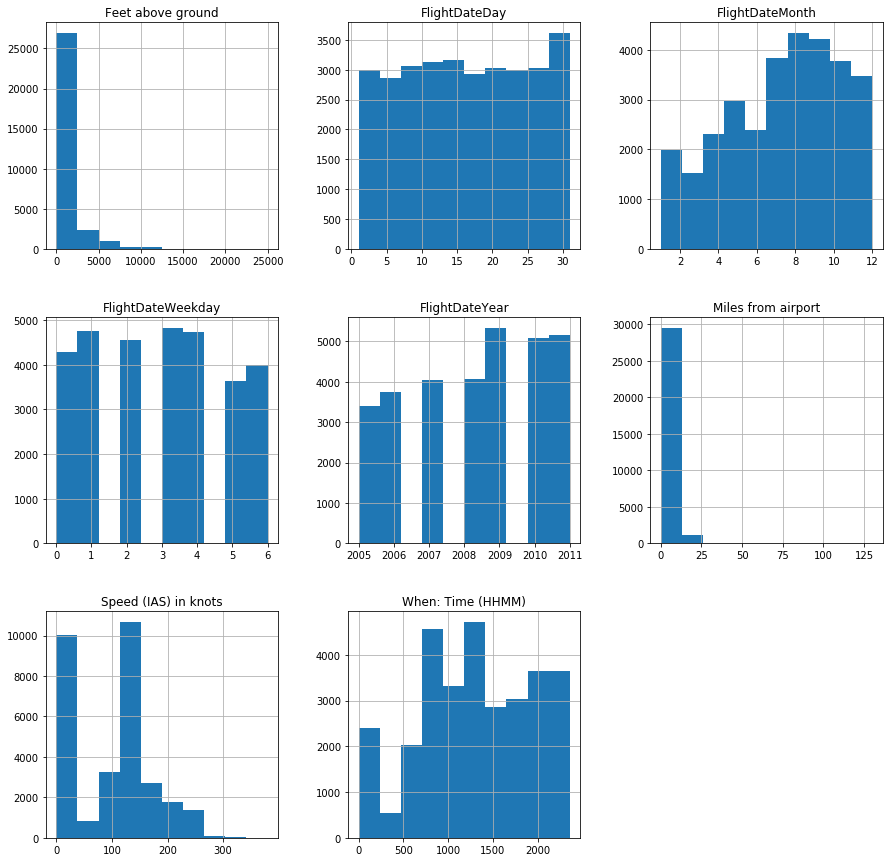

In [102]:
df_clean.hist(figsize=(15,15));

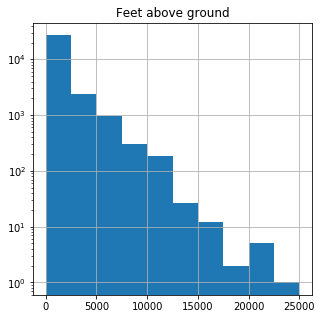

In [103]:
# df_clean[['Feet above ground', 'Speed (IAS) in knots', 'Miles from airport']].hist(figsize=(15,15))
df_clean['Feet above ground'].hist(figsize=(5,5))
plt.yscale('log')
plt.title('Feet above ground');

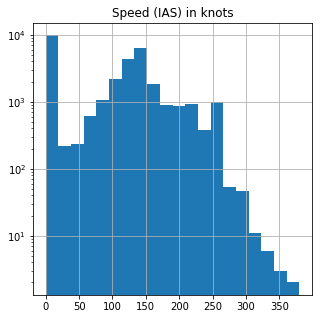

In [104]:
df_clean['Speed (IAS) in knots'].hist(figsize=(5,5), bins=20)
plt.yscale('log')
plt.title('Speed (IAS) in knots');

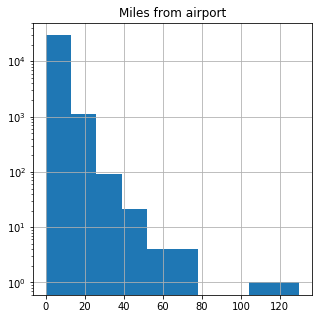

In [105]:
df_clean['Miles from airport'].hist(figsize=(5,5))
plt.yscale('log')
plt.title('Miles from airport');

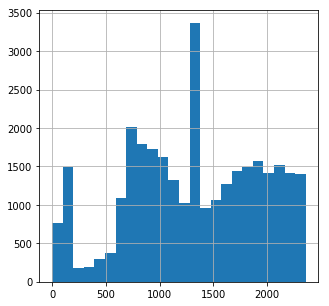

In [106]:
df_clean['When: Time (HHMM)'].hist(figsize=(5,5), bins=24);

## Erkenntnisse:
-Anzahl an Zwischenfällen fällt mit Flughöhe und Entfernung vom Flughafen exponentiell ab.

-Sehr viele Zwischenfälle bei sehr geringen Geschwindigkeiten und Geschwindigkeiten um die 150 Knoten.

-Anzahl an Zwischenfällen über die Jahre gestigen, besserer Plot wenn möglich!!!

-Etwas weniger Zwischenfälle an Wochenenden

-Anstieg der Zwischenfälle an den letzen drei Tagen des Monats

-Etwa doppelt so viele Zwischenfälle in der zweiten Jahreshälfte

-Sehr wenige Zwischenfälle zwischen 2 und 5 Uhr. Dann starker Anstieg ab 6 Uhr, abfallend ab 10 Uhr. Mittagstief mit extremen Peak um 13 Uhr. Mögliches Imputationsartefakt!?! Erneuter Anstieg ab 16 Uhr. Wider Abfallen nach Mitternacht. Spitze bei 1 Uhr könnte auch Artefakt sein.

## Barplots für Kategorie-Spalten

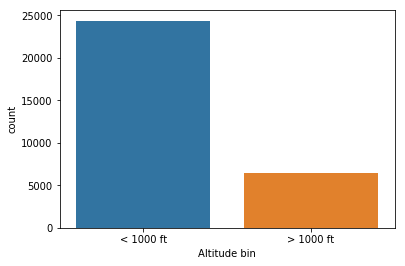

In [107]:
sns.countplot(x='Altitude bin', data=df_clean);

Zwischenfälle ereignen sich überwiegend in niedrigen Flughöhen unterhalb von 1000 Fuß.

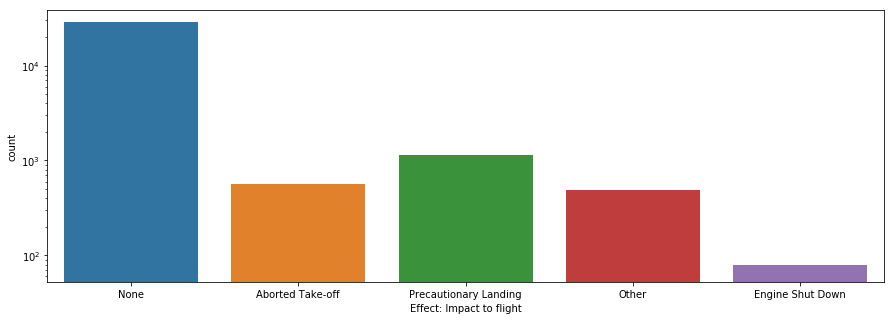

In [108]:
plt.figure(figsize=(15,5))
plt.yscale('log')
sns.countplot(x='Effect: Impact to flight', data=df_clean);

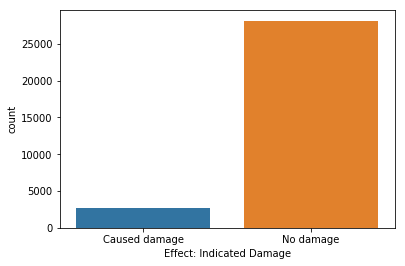

In [109]:
sns.countplot(x='Effect: Indicated Damage', data=df_clean);

Die allermeißten Zwischenfälle verursachen keinen Schaden und haben in der Regel keine nenneswerten Folgen.

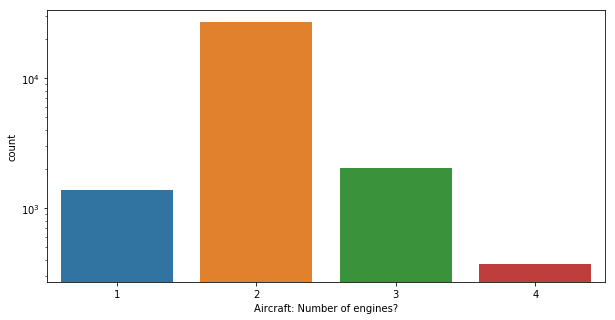

In [110]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='Aircraft: Number of engines?', data=df_clean);

Die Überwiegende Mehrheit aller Maschienen, die in Zwischenfälle verwickelt sind, haben nur 2 Antriebsmotoren.

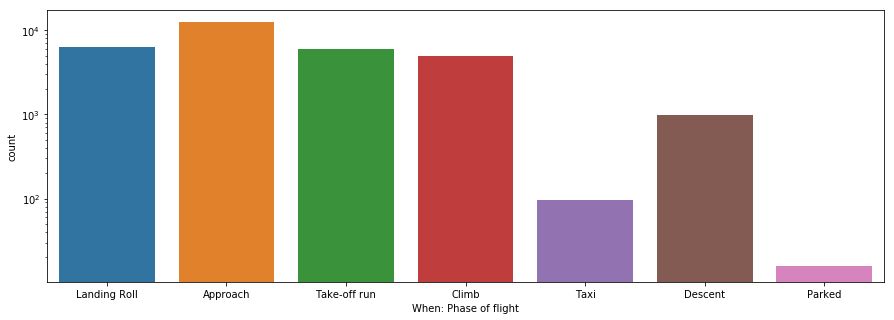

In [111]:
plt.figure(figsize=(15,5))
plt.yscale('log')
sns.countplot(x='When: Phase of flight', data=df_clean);

Zwischenfälle ereignen sich fast ausschließlich auf dem Runway, sowie beim Steigen und Annähern. Zwischenfälle mit stehenden oder fahrenden Flugzeugen sind selten.

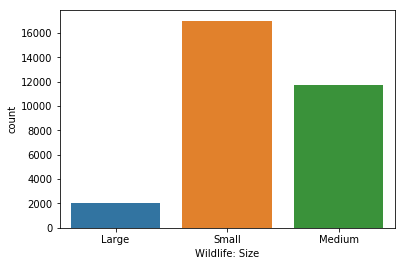

In [112]:
sns.countplot(x='Wildlife: Size', data=df_clean);

Zwischenfälle mit großen Vögeln sind selten.

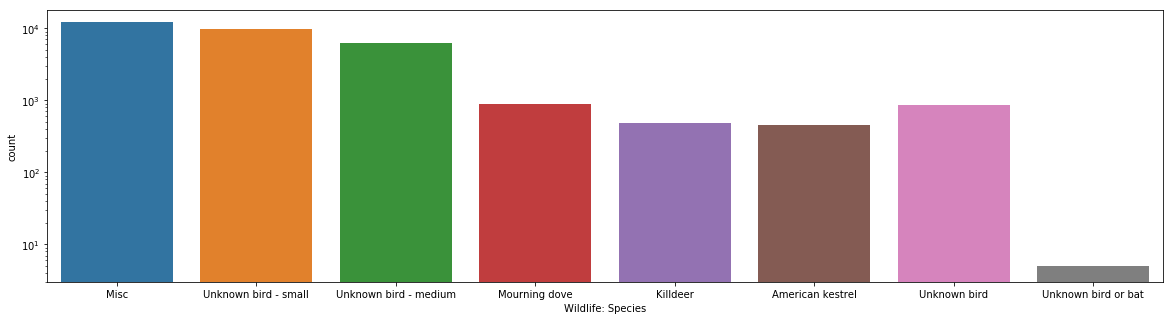

In [113]:
plt.figure(figsize=(20,5))
plt.yscale('log')
sns.countplot(x='Wildlife: Species', data=df_clean);

Es finden häufiger Kollisionen mit kleinen Vögel als mit mittleren oder großen Vögeln statt. Die Spezies scheint keinen Einfluss zu haben und sind in der Statistik eher gleichverteilt.

Vielleicht Anzahl an Kategorien reduzieren?

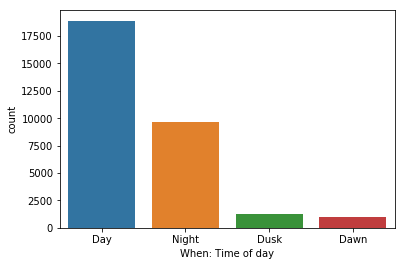

In [114]:
sns.countplot(x='When: Time of day', data=df_clean);

Am häufigsten treten Zwischenfälle tagsüber auf. Während der Sonnenauf und -untergangsphase fast nie.

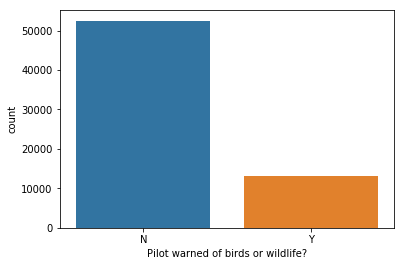

In [115]:
sns.countplot(x='Pilot warned of birds or wildlife?', data=df_new);

In der Mehrheit aller Fälle sind die Piloten nicht gewarnt.

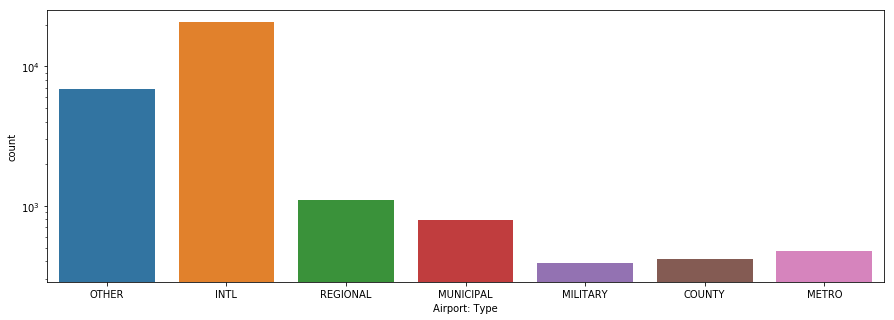

In [116]:
plt.figure(figsize=(15,5))
plt.yscale('log')
sns.countplot(x='Airport: Type', data=df_clean);

Zwischenfälle ereignen sich gehäuft in der Nähe von internationalen Flughäfen, wo auch der meißte Verkehr herrscht. Kleinere Flughäfen weisen weniger Zwischenfälle auf (nicht wirklich überraschend).

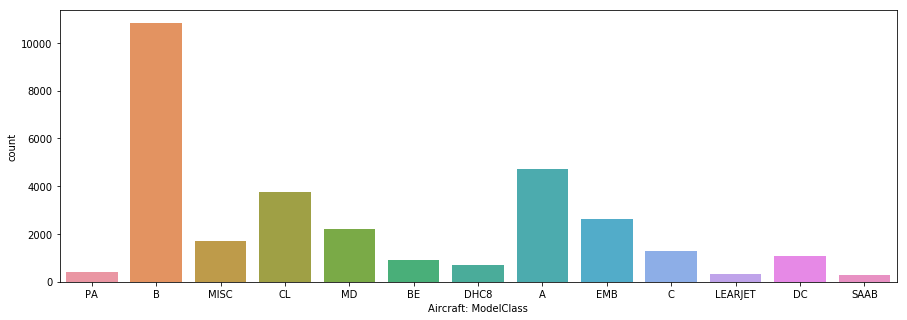

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(x='Aircraft: ModelClass', data=df_clean);

Am häufigsten sind Maschienen von Boeing und Airbus an Zwischenfällen beteiligt, sowie Challengers.

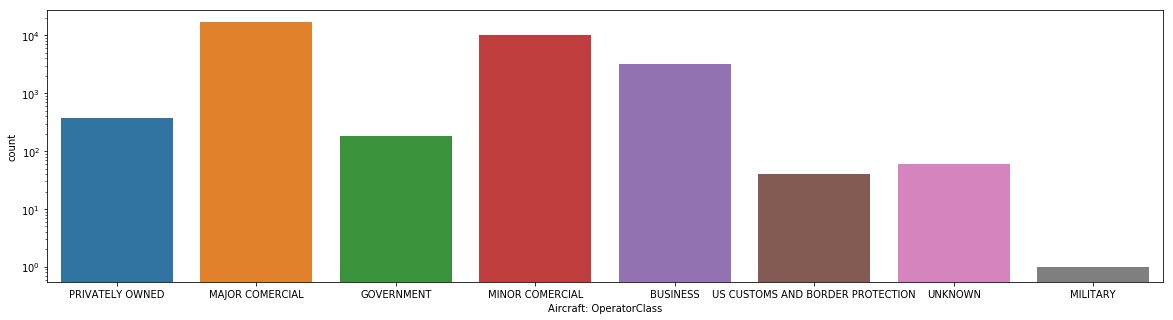

In [118]:
plt.figure(figsize=(20,5))
plt.yscale('log')
sns.countplot(x='Aircraft: OperatorClass', data=df_clean);

Der Anteil an kommerziellen- und Buisnessflügen dominiert deutlich die Statistik.

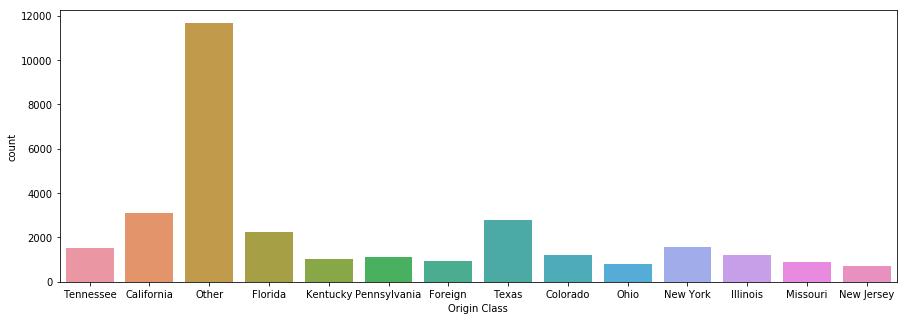

In [119]:
plt.figure(figsize=(15,5))
sns.countplot(x='Origin Class', data=df_clean);

Es tauchen mehr Flieger aus Texas, Californien und Florida in der Statisktik auf, aber im Großen und ganzen scheint der Ursprungsort nicht all zu relevant zu sein, da Zwischenfälle auf Staten etwa gleichverteilt sind.

# Korrelationen zwischen den numerischen Spalten

In [120]:
df_test = df_clean.copy()

### Mache aus 'Aircraft: Number of engines?' eine numerische Spalte

In [121]:
df_test['Aircraft: Number of engines?'] = df_test['Aircraft: Number of engines?'].astype('int64')

In [122]:
categorical_features = df_test.select_dtypes(exclude=['int64', 'float64']).columns.values

In [123]:
for feature in categorical_features:
    df_test[feature] = pd.factorize(df_test[feature], sort=True)[0]+1

### Berechne die Korrelationsmatrix

### Bemerkung:
Sinnvoller wäres eine One-Hot-Kategoriesierung für die kategorischen Merkmale einzusetzen. Grundsätzlich machbar, aber die resultierende 90x90 Matrix ist für Menschen nur schwer auszulesen und zu visualisieren. Viel Informationsgewinn wird damit auch nicht erzielt. (Wurde testweise erprobt)

In [124]:
df_test.corr(method='spearman').style.background_gradient(cmap='coolwarm', axis=None)

,Altitude bin,Effect: Impact to flight,Effect: Indicated Damage,Aircraft: Number of engines?,When: Phase of flight,Wildlife: Size,Wildlife: Species,When: Time (HHMM),When: Time of day,Pilot warned of birds or wildlife?,Miles from airport,Feet above ground,Speed (IAS) in knots,FlightDateYear,FlightDateMonth,FlightDateDay,FlightDateWeekday,Airport: Type,Aircraft: ModelClass,Aircraft: OperatorClass,Origin Class
Altitude bin,1,0.0405107,-0.0749318,0.133982,-0.328278,-0.158927,0.16512,0.127592,0.420516,-0.158719,0.61273,0.728514,0.464373,-0.00526844,0.0505255,0.00429694,-0.0160635,-0.0828409,-0.142257,-0.0675802,0.0557207
Effect: Impact to flight,0.0405107,1,-0.225217,-0.094157,-0.075415,-0.0776908,-0.0542633,0.0184813,-0.00274286,-0.0068688,0.0652235,0.107635,0.0468509,-0.0123767,-0.0101547,0.00467233,-0.00135124,0.0285458,0.0317455,-0.0431363,-0.0110598
Effect: Indicated Damage,-0.0749318,-0.225217,1,0.114542,0.032256,0.267774,0.174117,-0.0263202,-0.0140108,0.0232166,-0.0689697,-0.0933189,-0.0478846,0.0433686,0.00402717,-0.003664,-0.00232988,-0.047201,-0.0617164,0.0593051,0.0268752
Aircraft: Number of engines?,0.133982,-0.094157,0.114542,1,-0.0511917,-0.0544315,0.0764254,-0.0396409,0.155057,-0.0853711,0.103601,0.113715,0.0993801,-0.0299075,0.0084238,0.000424139,-0.00136717,-0.156358,0.00363186,0.0169962,0.0671829
When: Phase of flight,-0.328278,-0.075415,0.032256,-0.0511917,1,0.0640098,-0.197946,-0.103471,-0.312837,0.0586107,-0.685023,-0.75629,-0.466113,-0.0213308,-0.0329508,-0.00243711,0.0161591,0.0714449,0.114663,0.0590693,-0.0194278
Wildlife: Size,-0.158927,-0.0776908,0.267774,-0.0544315,0.0640098,1,0.360099,-0.0514378,-0.160535,0.101305,-0.144986,-0.157307,-0.0240297,0.112429,0.0185323,-0.00317602,0.000592411,0.00159121,0.00220921,0.0472934,0.0290811
Wildlife: Species,0.16512,-0.0542633,0.174117,0.0764254,-0.197946,0.360099,1,0.0183424,0.148998,-0.173845,0.250009,0.263266,0.265495,-0.0506477,0.0154654,0.00285251,0.00163852,-0.052065,-0.112026,-0.0534439,0.0254804
When: Time (HHMM),0.127592,0.0184813,-0.0263202,-0.0396409,-0.103471,-0.0514378,0.0183424,1,0.317672,0.0126346,0.120452,0.126913,0.0683612,0.0428309,0.0176718,0.00455126,-0.023314,-0.0132071,-0.0250754,0.00848083,0.00128297
When: Time of day,0.420516,-0.00274286,-0.0140108,0.155057,-0.312837,-0.160535,0.148998,0.317672,1,-0.145148,0.420946,0.446397,0.250517,-0.0169367,0.0753388,0.00308426,-0.0235489,-0.0714203,-0.147858,-0.0617257,0.0375405
Pilot warned of birds or wildlife?,-0.158719,-0.0068688,0.0232166,-0.0853711,0.0586107,0.101305,-0.173845,0.0126346,-0.145148,1,-0.146748,-0.162566,-0.0779368,0.0935077,0.00527871,-0.000747708,0.0172434,-0.0772207,0.0452341,0.10736,-0.0150538


## Interessante Korrelationen
Hohe Korrelationen zwischen Flughöhe, Geschwindigkeit, Abstand zum Flughafen und Flugphase. Nicht verwunderlich. Größen hägen klar zusammen.

Erlittener Schaden korreliert leicht positiv mit Größe und Spezies der Vögel.

Spezies korreliert mit Größe der Vögel, der Flughöhe, dem Abstand zum Flughafen und der Geschwindigkeit.

Flughöhe < 1000 korreliert positiv mit Tagflügen und negativ mit Nachtflügen
Für Flüghöhen > 1000 ist es genau umgekehrt. Nachts ereigenen sich Zwischenfälle eher in großen Höhen, tagsüber eher in niedrigen Höhen.

Tagszeit korreliert mit Distanz zum Flughafen und Geschwindigkeit.

Leichte Korrelationen zwischen Operator und Model erkennbar.

# Überblick über gruppierte Werte

## Aggregationen

In [125]:
pd.set_option('display.max_rows', 70)
df_clean[['Aircraft: ModelClass', 'Aircraft: OperatorClass', 'Origin Class']].groupby(
    ['Aircraft: OperatorClass', 'Aircraft: ModelClass']).count().rename(columns={'Origin Class': 'Count'})

Count
Aircraft: OperatorClass          Aircraft: ModelClass       
BUSINESS                         A                         3
                                 B                        37
                                 BE                      457
                                 C                       836
                                 CL                      120
                                 DC                        6
                                 DHC8                      4
                                 EMB                      38
                                 LEARJET                 259
                                 MD                        7
                                 MISC                   1125
                                 PA                      310
                                 SAAB                      6
GOVERNMENT                       B                         6
                                 BE                       20
                                 C                        28
                                 CL                        2
                                 DC                        4
                                 LEARJET                   2
                                 MD                        5
                                 MISC                    110
                                 PA                        8
MAJOR COMERCIAL                  A                      2839
                                 B                      8211
                                 BE                        5
                                 C                         3
                                 CL                     1693
                                 DC                      778
                                 DHC8                     62
                                 EMB                    1139
                                 LEARJET                   1
                                 MD                     1959
                                 MISC                     64
                                 PA                        1
                                 SAAB                     61
MILITARY                         C                         1
MINOR COMERCIAL                  A                      1885
                                 B                      2571
                                 BE                      379
                                 C                       224
                                 CL                     1931
                                 DC                      282
                                 DHC8                    619
                                 EMB                    1435
                                 LEARJET                  46
                                 MD                      218
                                 MISC                    299
                                 PA                       27
                                 SAAB                    201
PRIVATELY OWNED                  BE                       48
                                 C                       170
                                 CL                        1
                                 LEARJET                   8
                                 MISC                     66
                                 PA                       76
UNKNOWN                          A                         4
                                 B                         6
                                 BE                        5
                                 C                         7
                                 CL                        6
                                 DHC8                      1
                                 EMB                       7
                                 LEARJET                   2
                                 MISC                     17
                             

Für tatsächliche Fragestellung eher uninteressant.

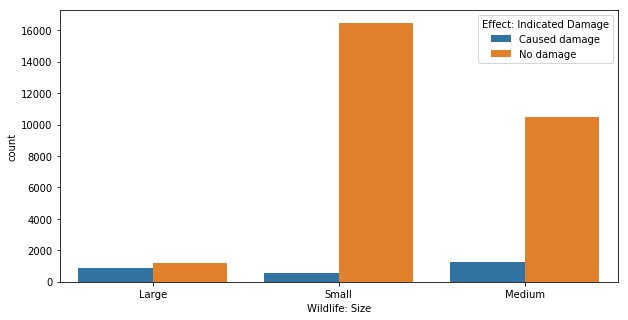

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(x='Wildlife: Size', data=df_clean, hue='Effect: Indicated Damage');

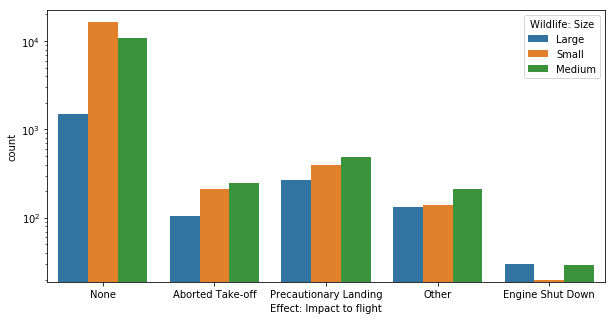

In [127]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='Effect: Impact to flight', data=df_clean, hue='Wildlife: Size');

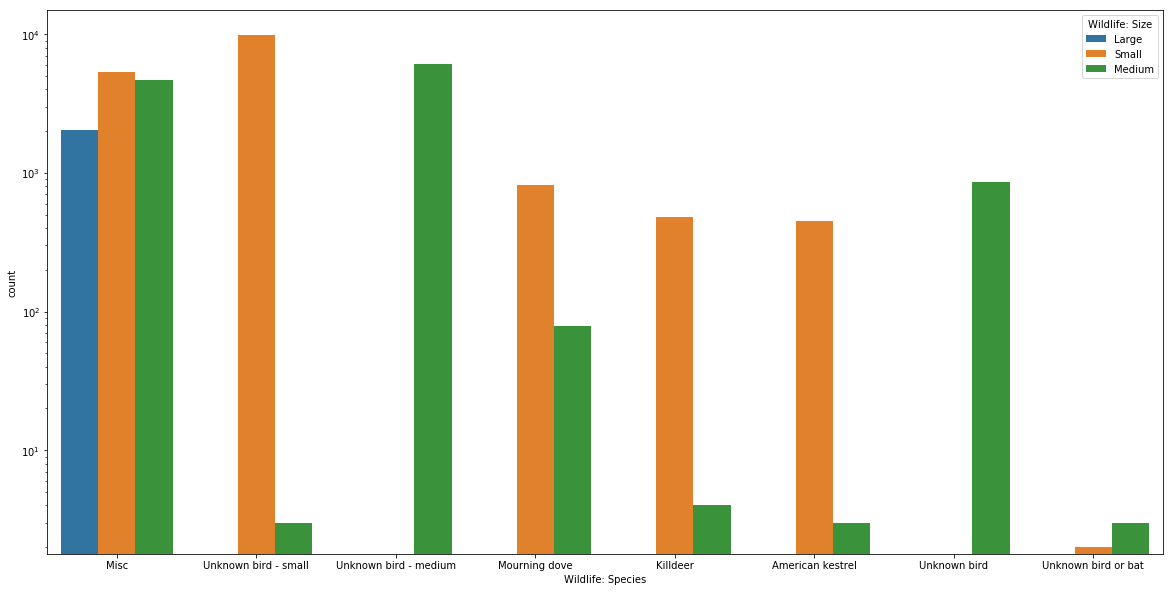

In [128]:
plt.figure(figsize=(20,10))
plt.yscale('log')
sns.countplot(x='Wildlife: Species', data=df_clean, hue='Wildlife: Size');

Zwischenfälle mit großen Vögel führen in etwa 50% der Fälle zu Schadensmeldungen, deutlich mehr als bei kleinen und mittleren Vögeln. Zwischenfälle mit großen Vögel sind aber auch bedeutend seltener. Große Vögel gehören zu selten auftetenden Spezies, welche unter die Kategorie "Misc" fallen.

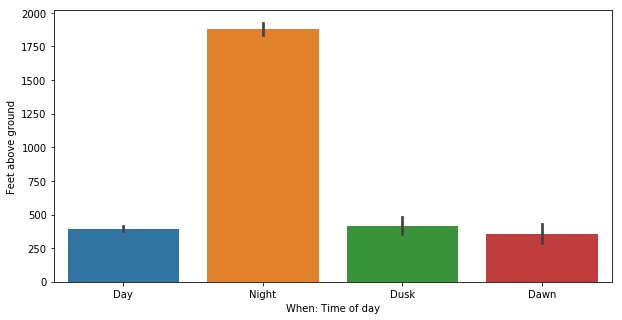

In [129]:
plt.figure(figsize=(10,5))
sns.barplot(x='When: Time of day', y='Feet above ground', data=df_clean);

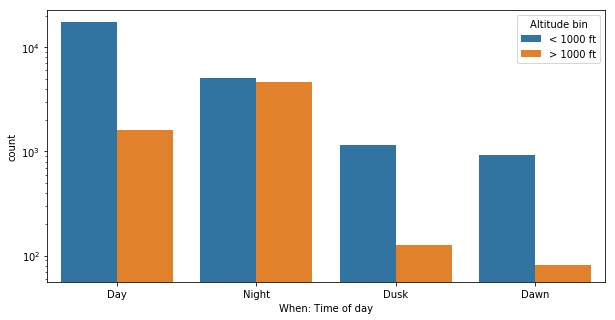

In [130]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='When: Time of day', data=df_clean, hue='Altitude bin');

Nachts ist die durchschnittliche Flughöhe in der sich Zusammenstöße abspielen deutlich höher. Das Verhältniss von Hochflugzusammenstößen liegt nachts bei etwa 1:1, während sich Zusammenstöße sonst eher im Niedrigflug abspielen.

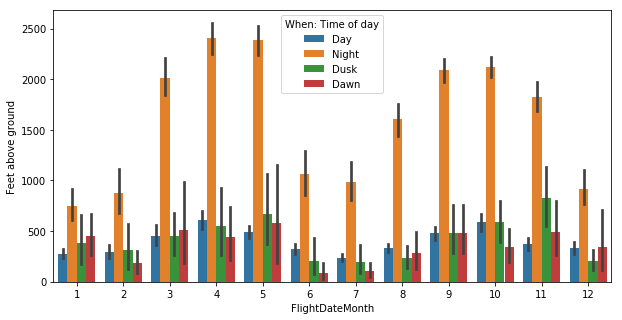

In [131]:
plt.figure(figsize=(10,5))
sns.barplot(x='FlightDateMonth', y='Feet above ground', data=df_clean, hue='When: Time of day');

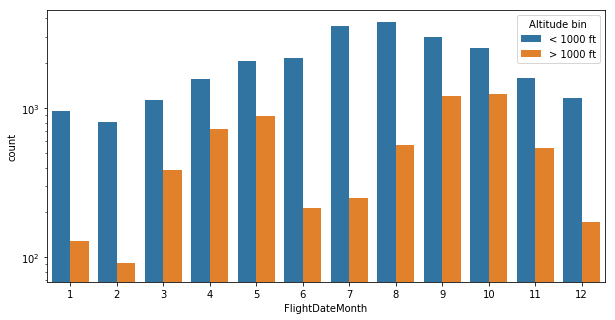

In [132]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='FlightDateMonth', data=df_clean, hue='Altitude bin');

Die durchschnittliche Höhe für Zusammenstöße schwankt saisonal. Tiefflugzusammenstöße finden vermehrt im Sommer statt, während Hochflugzusammenstöße in den Frühling und Herbst fallen; vermutlich bedingt durch die Wanderung der Zugvöhel.

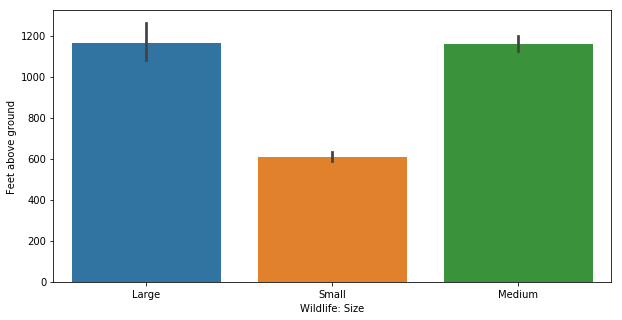

In [133]:
plt.figure(figsize=(10,5))
sns.barplot(x='Wildlife: Size', y='Feet above ground', data=df_clean);

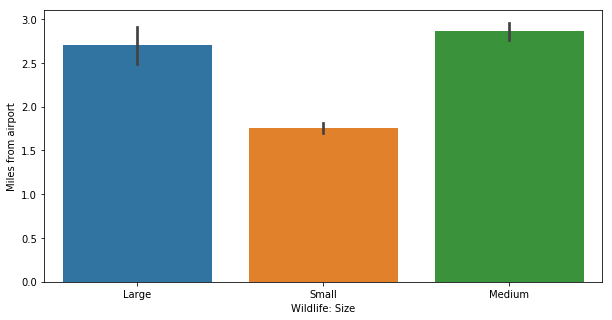

In [134]:
plt.figure(figsize=(10,5))
sns.barplot(x='Wildlife: Size', y='Miles from airport', data=df_clean);

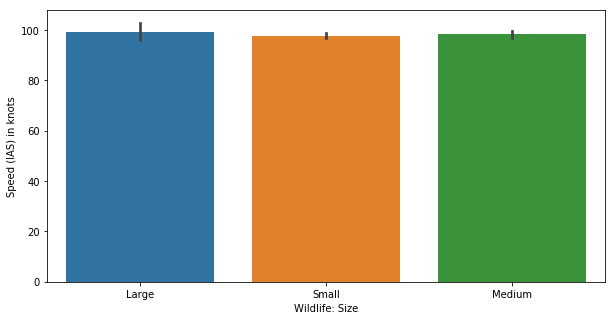

In [135]:
plt.figure(figsize=(10,5))
sns.barplot(x='Wildlife: Size', y='Speed (IAS) in knots', data=df_clean);

Vorfälle mit großen und mittleren Vögeln ereignen sich in der Regel in >2,5 Meilen Abstand vom Flughafen und in Höhen oberhalb von 1000 Fuß.
Vorfälle mit kleineren Vögeln spielen sich dagegen in einem Umkreis von etwa 2 Meilen um den Flughafen ab, in einer Höhe von durchschnittlich 600 Fuß.
Es besteht scheinbar kein Zusammenhang zwischen der Geschwindigkeit und der Größe der Vögel.

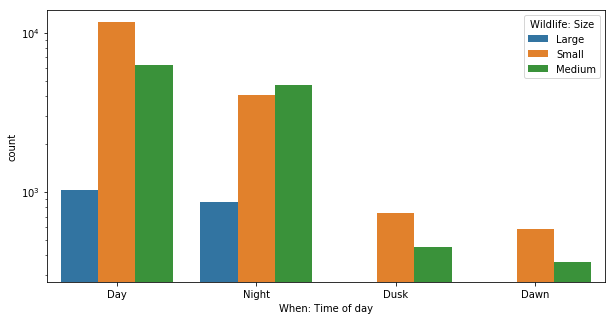

In [136]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='When: Time of day', data=df_clean, hue='Wildlife: Size');

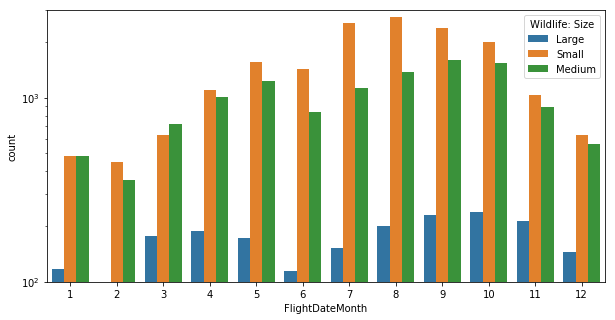

In [137]:
plt.figure(figsize=(10,5))
plt.ylim(1e2,3e3)
plt.yscale('log')
sns.countplot(x='FlightDateMonth', data=df_clean, hue='Wildlife: Size');

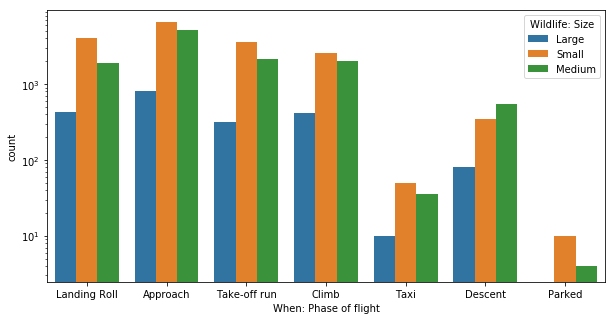

In [138]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='When: Phase of flight', data=df_clean, hue='Wildlife: Size');

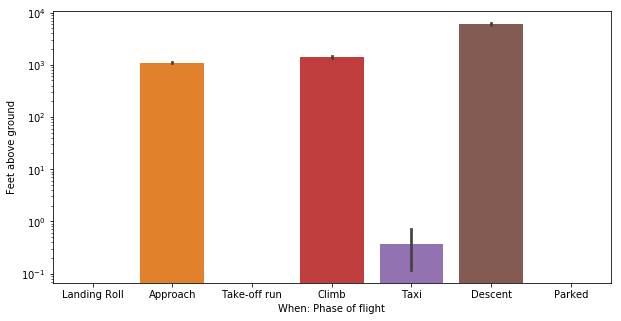

In [139]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.barplot(x='When: Phase of flight', y='Feet above ground', data=df_clean);

Vorfälle mit großen und mittleren Vögeln ereignen sich tagsüber nur etwas häufiger als nachts. Kleine Vögel hingegen verursachen nachts deutlich weniger Vorfälle.
Die Häufigkeit von Zwischenfällen mit kleinen Vögeln folgt einem saisonalen Trend mit einem Maximum im August und einem Minimum im Februar; also im Sommer häufiger als im Winter.
Für großen und mittleren Vögel treten Vorfälle am häufigsten im Frühling und Herbst auf (Mai und Oktober).
Es scheint keinen nennenswerten Zusammenhang zwischen Vogelgröße und Flugphase zu geben.

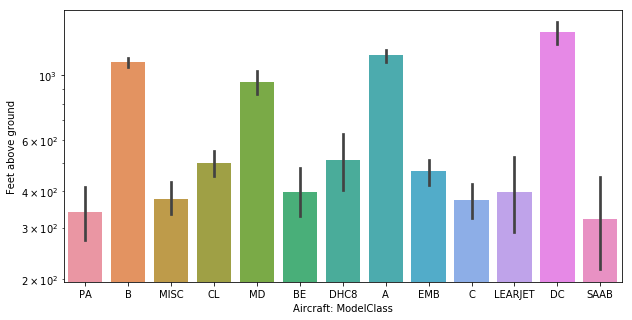

In [140]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.barplot(x='Aircraft: ModelClass', y='Feet above ground', data=df_clean);

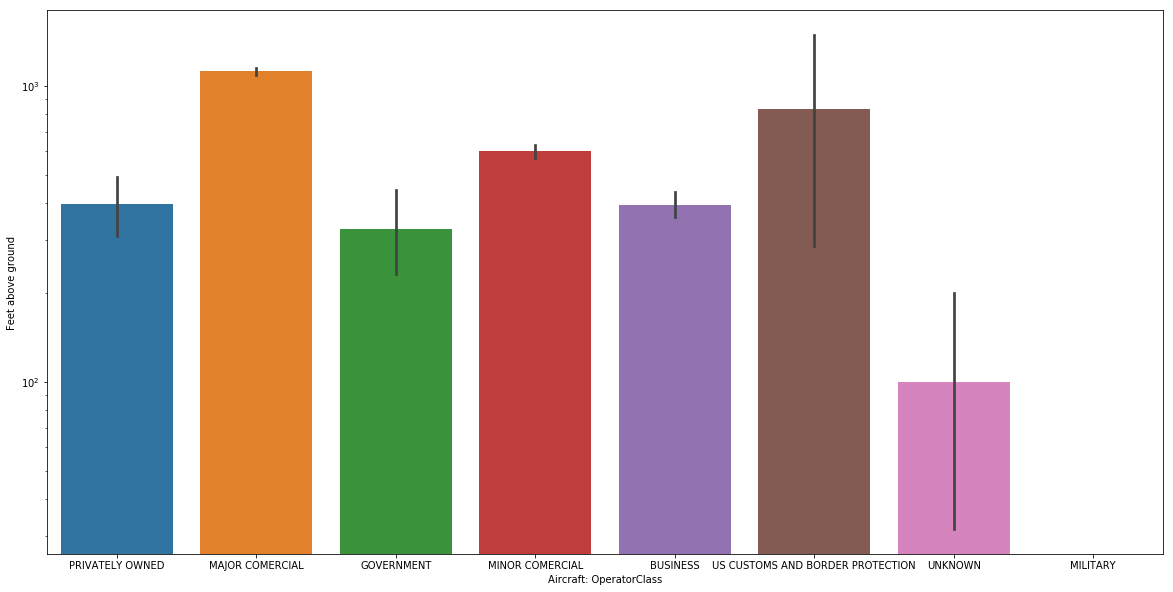

In [141]:
plt.figure(figsize=(20,10))
plt.yscale('log')
sns.barplot(x='Aircraft: OperatorClass', y='Feet above ground', data=df_clean);

Im Mittel treten Zwischenfälle oberhalb von 1000 Fuß am ehesten für Maschinen von großen kommerziellen Fluggesellschaften und dem Zoll auf.
Die Modelle, die gehäuft in größeren Höhen mit Vögeln kollidieren gehören zu Boeing, Airbus, Douglas Aircraft Company und McDonnell Douglas.

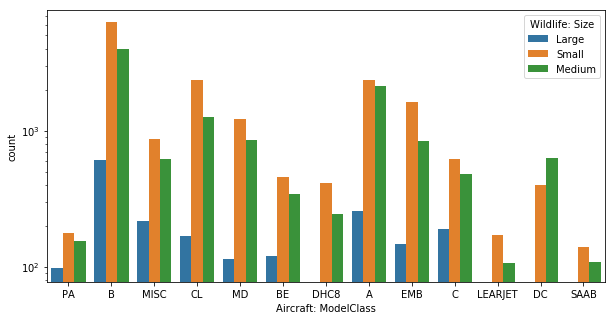

In [142]:
plt.figure(figsize=(10,5))
plt.yscale('log')
sns.countplot(x='Aircraft: ModelClass', data=df_clean, hue='Wildlife: Size');

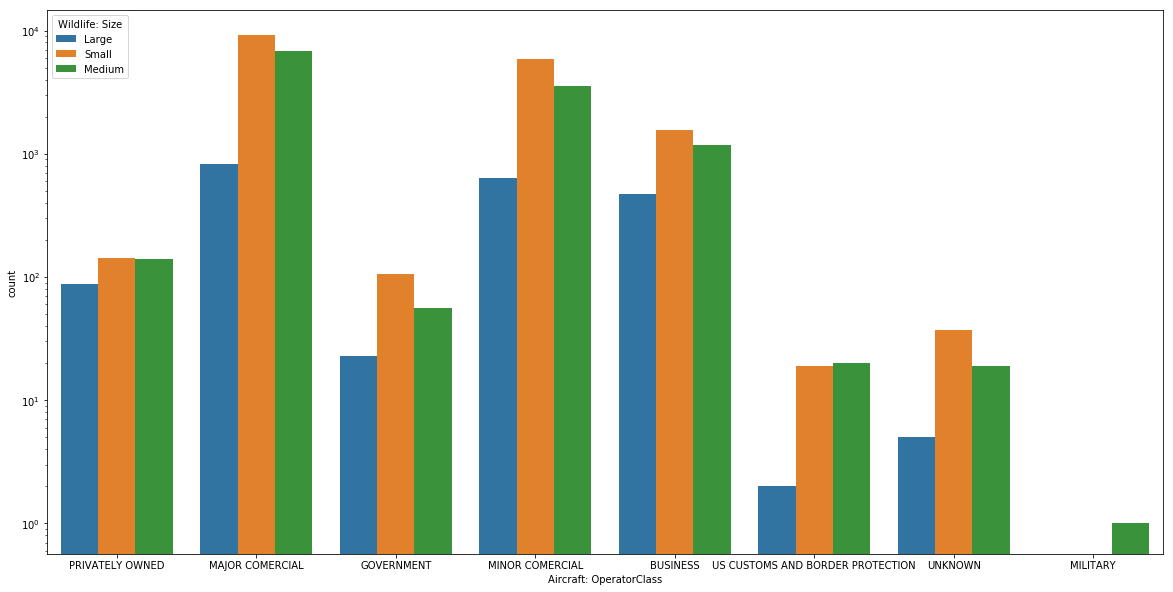

In [143]:
plt.figure(figsize=(20,10))
plt.yscale('log')
sns.countplot(x='Aircraft: OperatorClass', data=df_clean, hue='Wildlife: Size');

Keine nennenswerten Zusammenhänge zwischen Vogelgröße und Flugzeug-Modell/Operator

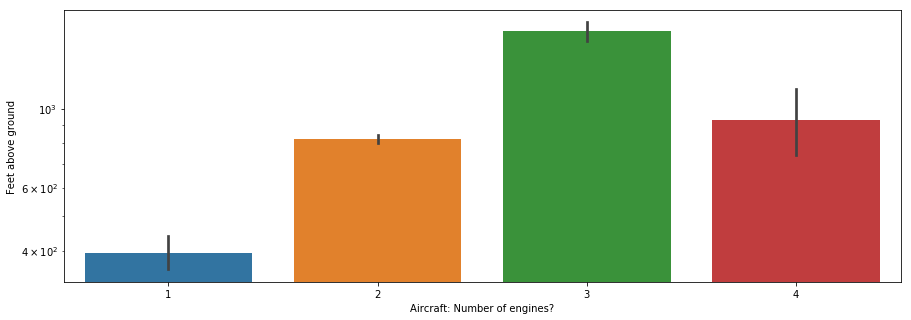

In [144]:
plt.figure(figsize=(15,5))
plt.yscale('log')
sns.barplot(x='Aircraft: Number of engines?', y='Feet above ground', data=df_clean);

# Zusammenfassung der Ergebnisse

Die Analyse ergibt, dass Kollisionsereignisse mit Vögeln meistens im Umkreis weniger Meilen des Fluglatzes und in sehr geringen Höhen unterhalb von 1000 Fuß stattfinden.
Die Flugphasen unter denen Vogelkollisionen am ehesten auftreten sind Starts und Landungen auf dem Runway, sowie der Steigvorgang nach dem Abheben und dem Annähern an den Flughafen.

Erklärbar werden diese Beobachtungen durch Hervorhebung der verschiedenen Typen von Vögel, welche an den Kollisionen beteiligt sind. Am sinnvollsten kann zwischen kleinen, mittleren und großen Vögeln unterschieden werden. Die explizite Spezies des Vogels scheint im Bezug auf Kollisionen mit Flugzeugen unwichtig zu sein.

Kleine Vögel sind die am stärksten repräsentierte Gruppe in den Kollisionsstatistiken. Sie verursachen Vorfälle vornehmlich in geringen Höhen unterhalb von 1000 Fuß und in der Nähe des Flugplatzes. Tagsüber ereignen sich mehr Vorfälle mit kleinen Vögeln, was nahelegt, dass sie nachts weniger aktiv sind. Die Häufigkeit mit der sie Kollisionen eingehen folgt einem Jahreszyklus. Im Sommer (August) sind sie am aktivsten, während sich im Winter (Februar) deutlich weniger Vorfälle ereignen. Kollisionen mit kleinen Vögeln verursachen selten Schäden und haben kaum Konsequenzen. Selten kommt es zu Notlandungen und fast nie zu Motorausfällen.

Dem gegenüber steht die Gruppe der mittleren und großen Vögel. Sie sind vornehmlich für Kollisionsereignisse in Höhen oberhalb von 1000 Fuß verantwortlich. Kollisionen mit mittelgroßen und vor allem großen Vögeln sind dafür seltener als Zwischenfälle mit kleinen Vögeln. Im Gegensatz zu kleinen Vögeln, sind sie Nachts fast genauso aktiv wie tagsüber, sodass die Zahl an Vorfällen mit ihnen Nachts kaum abnimmt. Ihre Aktivität folgt ebenfalls einen saisonalen Zyklus. Im Frühling und Herbst ist ihre Aktivität am höchsten, was dafür spricht, dass es sich um Zugvögel handelt.
Zusammenstöße mit großen Vögeln sind zwar sehr selten, verursachen aber überproportional oft einen Maschinenschaden.

Die kombinierte Aktivität von tendenziell eher tagaktiven Kleinvögeln und ganztägig aktiven größeren Vögeln führt zu einer tageszeitabhänigen Verteilung von Kollisionsereignissen. Tagsüber finden wesentlich mehr statt als Nachts und während der Dämmerung und dem Morgengrauen finden so gut wie keine statt.
Über das ganze Jahr betrachtet, finden in der zweiten Jahreshälfte fast doppelt so viele Zusammenstöße mit Vögeln statt.

Interessanterweise nehmen Kollisionsereignisse am Monatsende leicht zu. Der Effekt ist nicht verstanden.
Die leichte Abnahme von Kollisionsereignissen am Wochenende ist vermutlich auf das reduzierte Flugaufkommen zurückzuführen.
In dem betrachteten Zeitraum ist die Menge an erfasste Kollisionsereignissen pro Jahr fast beständig angewachsen. Grund hierfür ist vermutlich der fortlaufende Anstieg des Luftverkehrs.

In den meißten Fällen, in denen Unfälle auftraten, waren die Piloten nicht vor Vögeln gewarnt worden.

Maschinen mit zwei Motoren erleiden am häufigsten Kollisionen mit Vögeln. Diese finden im Schnitt auf einer Höhe von 800 Fuß statt.
Die Maschinen von kommerziellen Fluggesellschaften und Business-Flügen tauchen besonders häufig in den Kollisionsstatistiken auf. Die häufigsten Modelle gehören zu Boeing, Airbus und Challenger.
An Kollisionen oberhalb von 1000 Fuß sind am ehesten die Maschinen großer kommerzieller Fluggesellschaften und des Zolls beteiligt. Die häufigsten Modelle gehören zu Boeing, Airbus, Douglas Aircraft Company und McDonnell Douglas.
Inwiefern diese Faktoren Zusammenstöße mit Vögeln begünstigen ist unklar, da das Gesamtaufkommen von Flügen dieser Art unbekannt ist.

Viele Kollisionen ereignen sich an großen internationalen Flughäfen, was nichts bedeuten muss, da dort allgemein ein höheres Verkehrsaufkommen herrscht.

Es scheint als hätten Parameter wie Flugbetreiber und Ursprungsflughafen keinen signifikanten Einfluss auf die Wahrscheinlichkeit für Zusammenstöße zwischen Flugzeugen und Vögeln.